<h3> Importing Libraries </h3>

In [14]:
import numpy as np
from numpy import mean
from numpy import std
from scipy import io
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

<h3> Creating Logistic Regression Model using functions </h3>

In [15]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def feed_forward(x, weights, bias):
    z = np.dot(x, weights) + bias
    output = sigmoid_function(z)
    return output

def loss_function(y, y_pred):
    m = y.shape[0]
    loss = -(1/m) * np.sum((y * np.log(y_pred + 1e-7)) + ((1 - y) * np.log(1 - y_pred + 1e-7)))
    return loss

def backward_propagation(x, y, y_pred, weights, bias, learning_rate):
    m = y.shape[0]
    dw = np.dot(x.T, (y_pred - y)) / m
    db = np.sum(y_pred - y) / m
    updated_weights = weights - (learning_rate * dw)
    updated_bias = bias - (learning_rate * db)
    return updated_weights, updated_bias

def logistic_regression(x, y, learning_rate, max_iterations):
    weights = np.random.uniform(low=0.0, high=1, size=(x.shape[1]))
    bias = 0.01

    for _ in range(max_iterations):
        y_pred = feed_forward(x, weights, bias)
        loss = loss_function(y, y_pred)
        weights, bias = backward_propagation(x, y, y_pred, weights, bias, learning_rate)
    
    return weights, bias

<h3> Extracting the data </h3>

In [16]:
# load file
file = io.loadmat('WLDataCW.mat')

# extract features and labels from file data
x_features = file['data']
y_labels = file['label']

# reshape features into a 2D array
x_transpose = x_features.T
X_features = x_transpose.reshape(360, 62*512)

# reshape labels into a vector
Y_labels = y_labels.reshape(360,)


<h3> Split data into Train Test and Compiling the model </h3>

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_features, Y_labels, test_size=0.2, random_state=12)

model_learning_rate = 0.01 
max_num_of_iterations = 25

weights, bias = logistic_regression(x_train, y_train, model_learning_rate, max_num_of_iterations)
y_pred = feed_forward(x_test, weights, bias)
predicted_labels = [1 if probability > 0.5 else 0 for probability in y_pred]

accuracy = accuracy_score(y_test, predicted_labels)
print(accuracy)
rounded_accuracy = round(accuracy, 4)
print(f"Accuracy: {rounded_accuracy*100}%")

0.5
Accuracy: 50.0%


<h3> Plotting the accuracy score </h3>

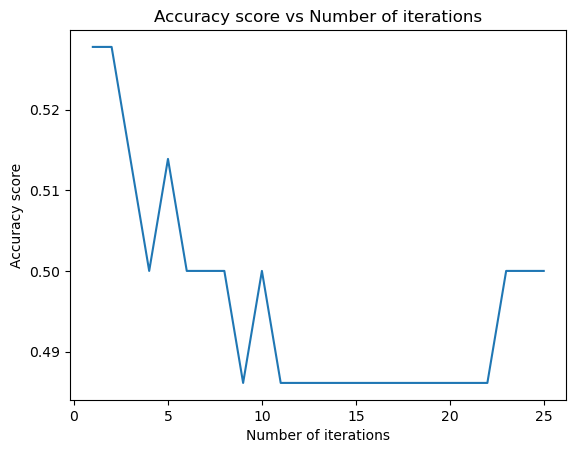

In [18]:
accuracy_scores = []

for i in range(max_num_of_iterations):
    weights, bias = logistic_regression(x_train, y_train, model_learning_rate, i+1)
    y_pred = feed_forward(x_test, weights, bias)
    predicted_labels = [1 if probability > 0.5 else 0 for probability in y_pred]
    accuracy = accuracy_score(y_test, predicted_labels)
    accuracy_scores.append(accuracy)

plt.plot(range(1, max_num_of_iterations+1), accuracy_scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy score')
plt.title('Accuracy score vs Number of iterations')
plt.show()


<h3> Performance calculation using K-Fold Cross validation </h3>

In [19]:
cv = KFold(n_splits=5, shuffle=True, random_state=10)

In [20]:
accuracies = []

for train_ind, test_ind in cv.split(X_features):
    x_train, x_test, y_train, y_test = X_features[train_ind], X_features[test_ind], Y_labels[train_ind], Y_labels[test_ind]

    model_learning_rate = 0.01
    max_num_of_iterations = 30

    weights, bias = logistic_regression(x_train, y_train, model_learning_rate, max_num_of_iterations)
    y_pred = feed_forward(x_test, weights, bias)
    predicted_labels = [1 if probability > 0.5 else 0 for probability in y_pred]

    accuracy = accuracy_score(y_test, predicted_labels)
    rounded_accuracy = round(accuracy, 4)
    accuracies.append(rounded_accuracy)



In [21]:
print(accuracies)

[0.4722, 0.6111, 0.4722, 0.5, 0.4583]


In [22]:
mean_score = np.mean(accuracies)
print(mean_score*100)

50.275999999999996


<h3> Plotting the graph cross validation scores </h3>

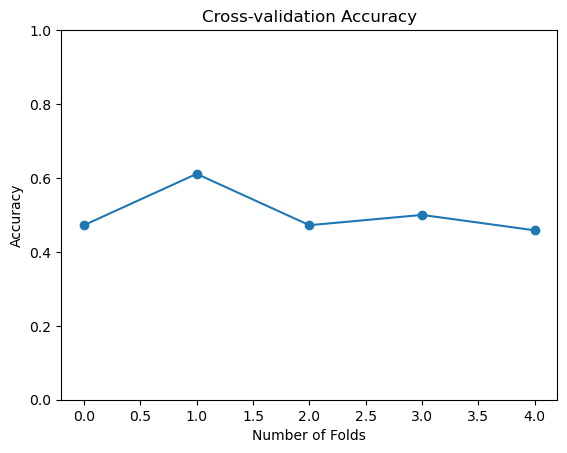

In [23]:
plt.plot(accuracies, 'o-')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Cross-validation Accuracy')
plt.show()